# Tom's Diner: Kompression von Audiodaten

Demonstration der Unterschiede in der Audioqualität durch Kompression am Beispiel von Suzanne Vegas Tom's Diner.

Ausgehend von der unkomprimierten Wav-Datei wurden komprimierte MP3-Versionen erstellt:
```
ffmpeg -i toms-diner-wav.wav -b:a 128k toms-diner-128.mp3
ffmpeg -i toms-diner-wav.wav -b:a 320k toms-diner-320.mp3
```

* Dateigröße wav: 3,7 MB
* Dateigröße mp3-128k: 332 kB
* Dateigröße mp3-320k: 830 kB

Quelle: [npr: How Well Can You Hear Audio Quality?](https://www.npr.org/sections/therecord/2015/06/02/411473508/how-well-can-you-hear-audio-quality)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile

import audioread
import soundfile
from IPython.display import Audio
import librosa.display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

ModuleNotFoundError: No module named 'audioread'

In [2]:
def print_spectrogram(data, title):
    
    f, t, spectrogram = scipy.signal.spectrogram(data, samplerate)
    
    fig = plt.figure(figsize=(10,6))
    
    #  only use a dynamic range of 25 dB
    v_min = np.max(spectrogram)-25
    
    np.seterr(divide = 'ignore')
    plt.pcolormesh(t, f, np.log(spectrogram), vmin=v_min, shading='auto', cmap='jet')
    plt.colorbar()

    plt.ylabel('Frequenz [Hz]')
    plt.xlabel('Zeit [sec]')
    plt.title(title)
    
    np.seterr(divide = 'warn')
    #plt.savefig('test.png', dpi=300)

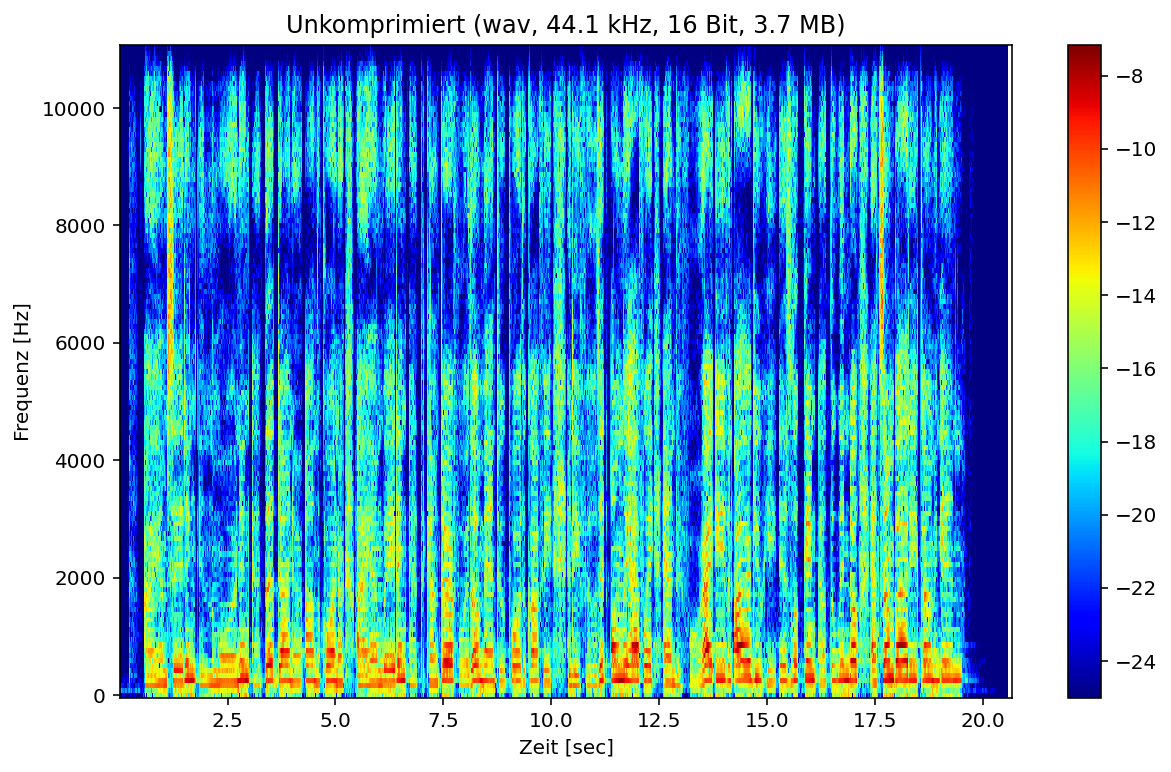

In [3]:
data_wav, samplerate = librosa.load('./toms-diner-wav.wav')

print_spectrogram(data_wav, 'Unkomprimiert (wav, 44.1 kHz, 16 Bit, 3.7 MB)')
Audio(data_wav, rate=samplerate)

/usr/local/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


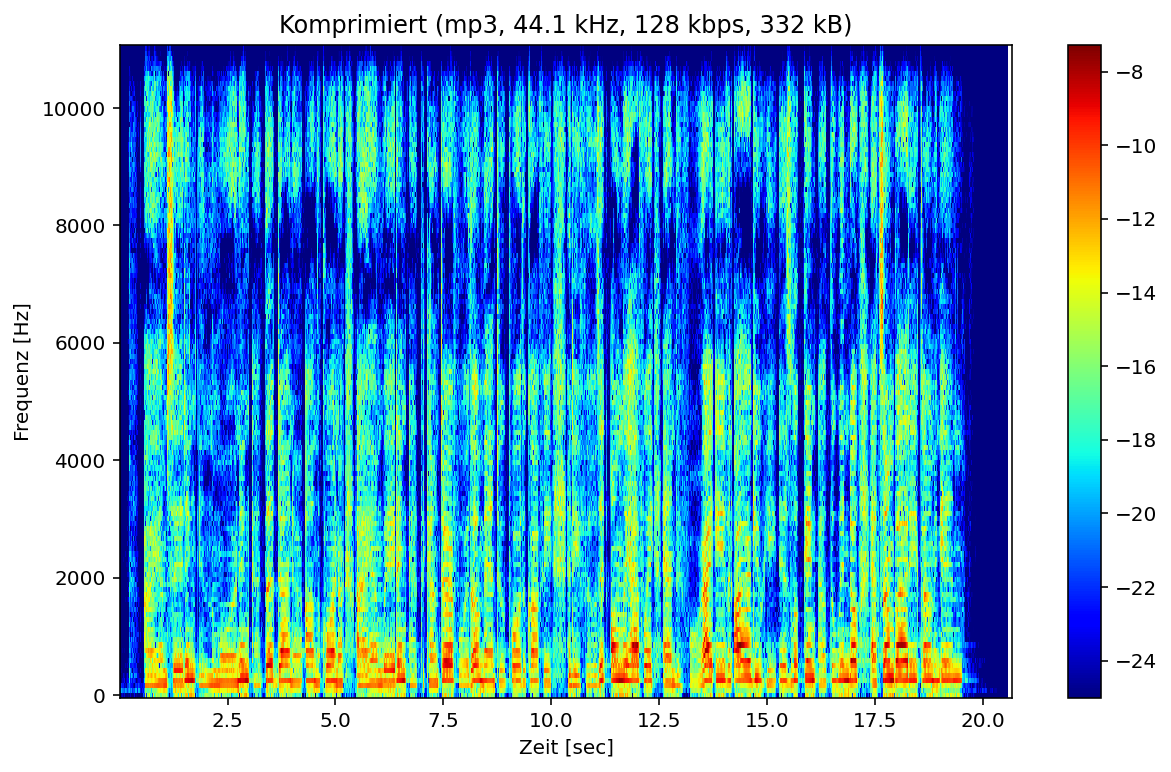

In [4]:
data_128, samplerate = librosa.load('./toms-diner-128.mp3')

print_spectrogram(data_128, 'Komprimiert (mp3, 44.1 kHz, 128 kbps, 332 kB)')
Audio(data_128, rate=samplerate)

/usr/local/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


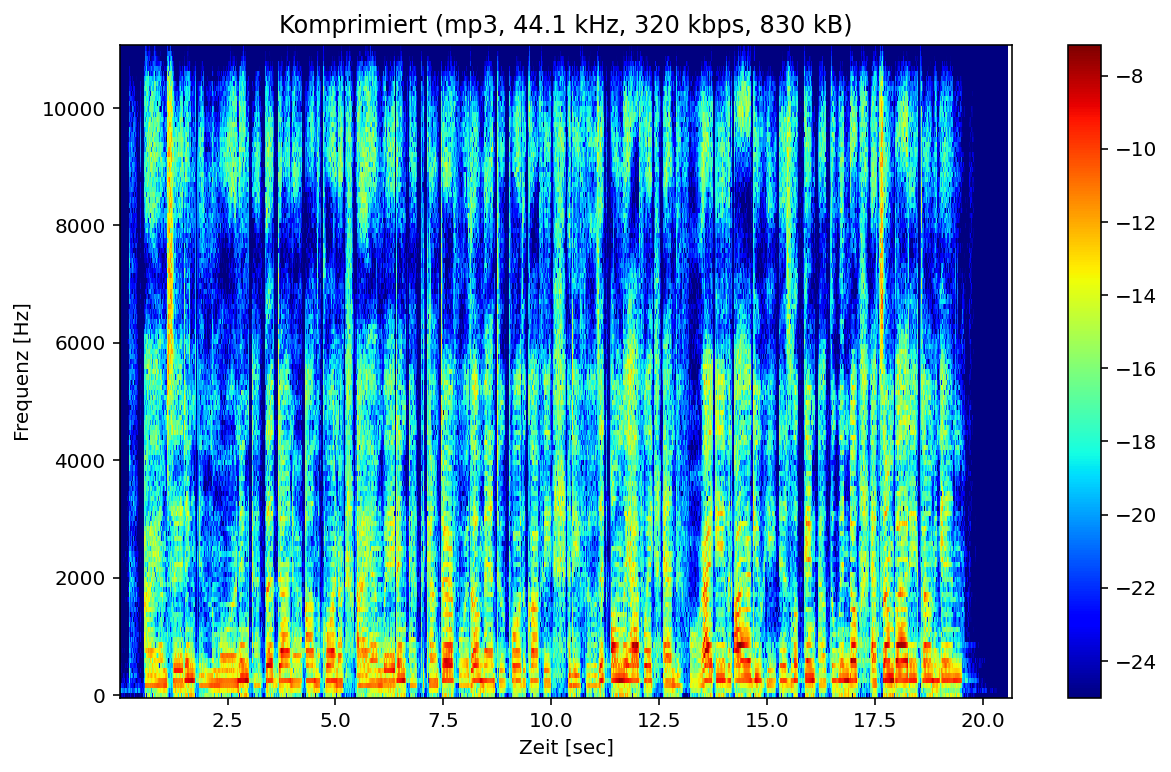

In [5]:
data_320, samplerate = librosa.load('./toms-diner-320.mp3')

print_spectrogram(data_320, 'Komprimiert (mp3, 44.1 kHz, 320 kbps, 830 kB)')
Audio(data_320, rate=samplerate)

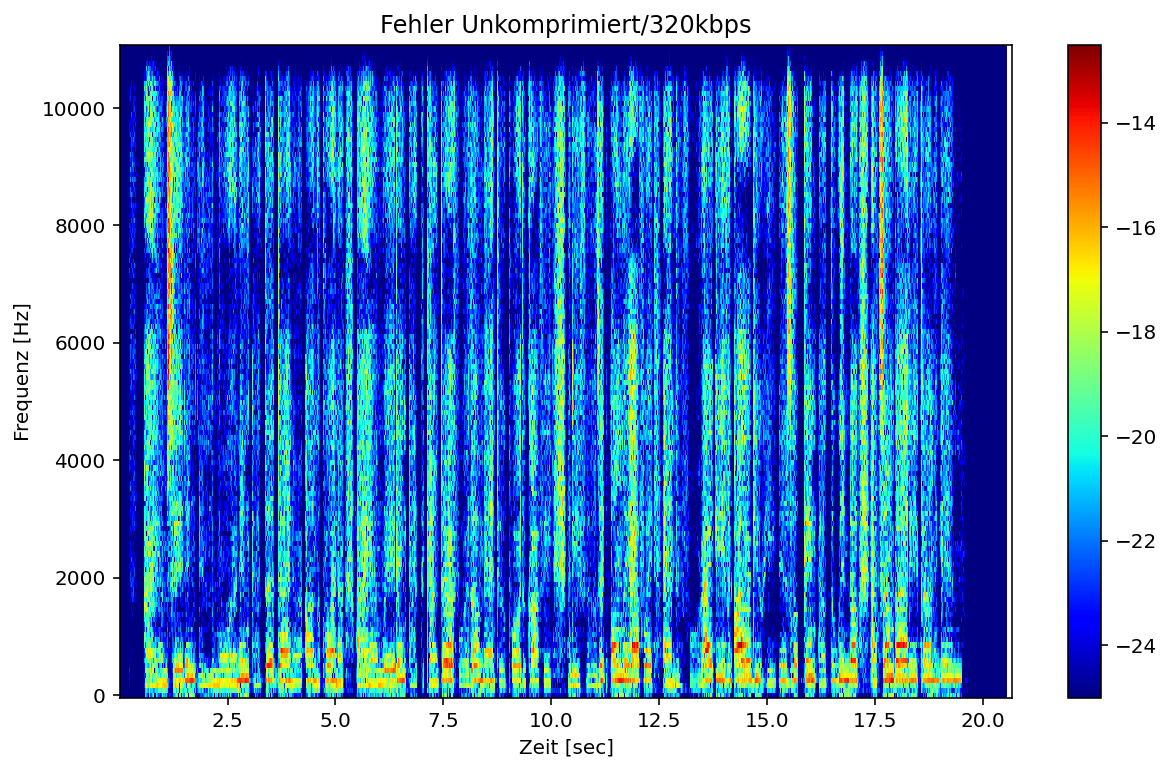

In [6]:
error128 = data_wav - data_128;

print_spectrogram(error128, 'Fehler Unkomprimiert/320kbps')
Audio(error128, rate=samplerate)

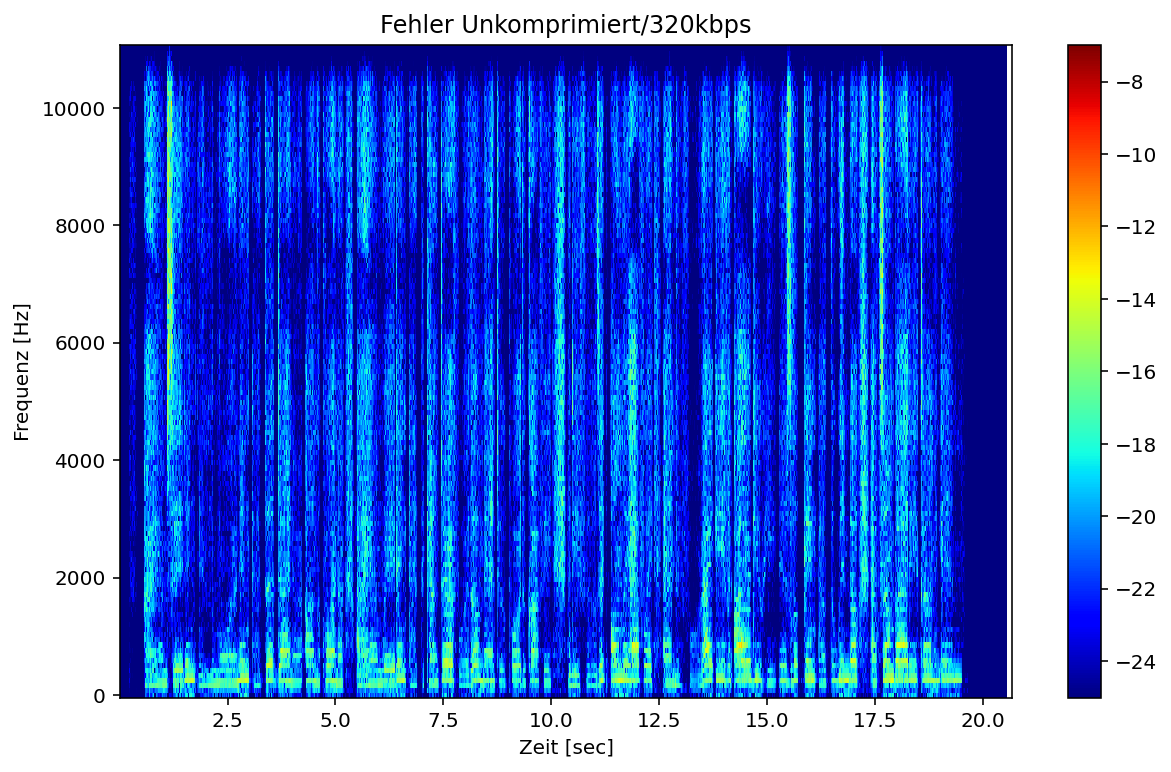

In [58]:
f,t,spec = signal.spectrogram(diff, fs)

fig = plt.figure(figsize=(10,6))
v_min = np.max(spec)-25
    
np.seterr(divide = 'ignore')
plt.pcolormesh(t, f, np.log(spec), shading='auto', vmin=-25, vmax=-7, cmap='jet')
plt.colorbar()

plt.ylabel('Frequenz [Hz]')
plt.xlabel('Zeit [sec]')
plt.title('Fehler Unkomprimiert/320kbps')

plt.savefig('toms-diner-error320.png', dpi=300)

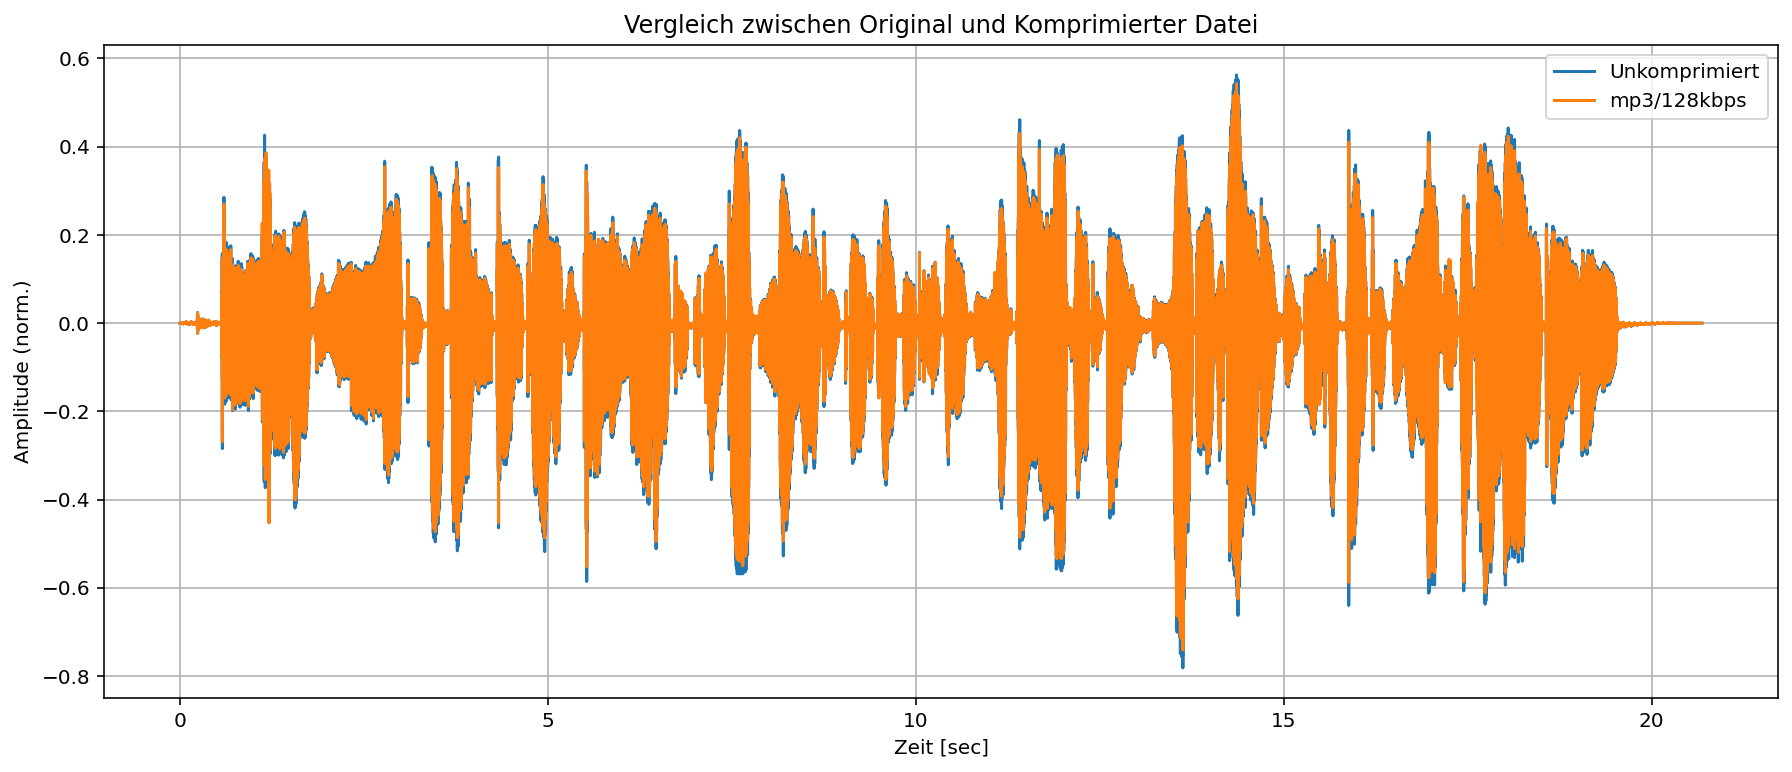

In [120]:
t = np.arange(len(audio1))/fs

fig = plt.figure(figsize=(15,6))
plt.plot(t, audio1, label='Unkomprimiert')
plt.plot(t, audio2, label='mp3/128kbps')
plt.xlabel('Zeit [sec]')
plt.ylabel('Amplitude (norm.)')
plt.grid()
plt.legend()
plt.title('Vergleich zwischen Original und Komprimierter Datei')
plt.savefig('toms-diner-error128_time.png', dpi=300)

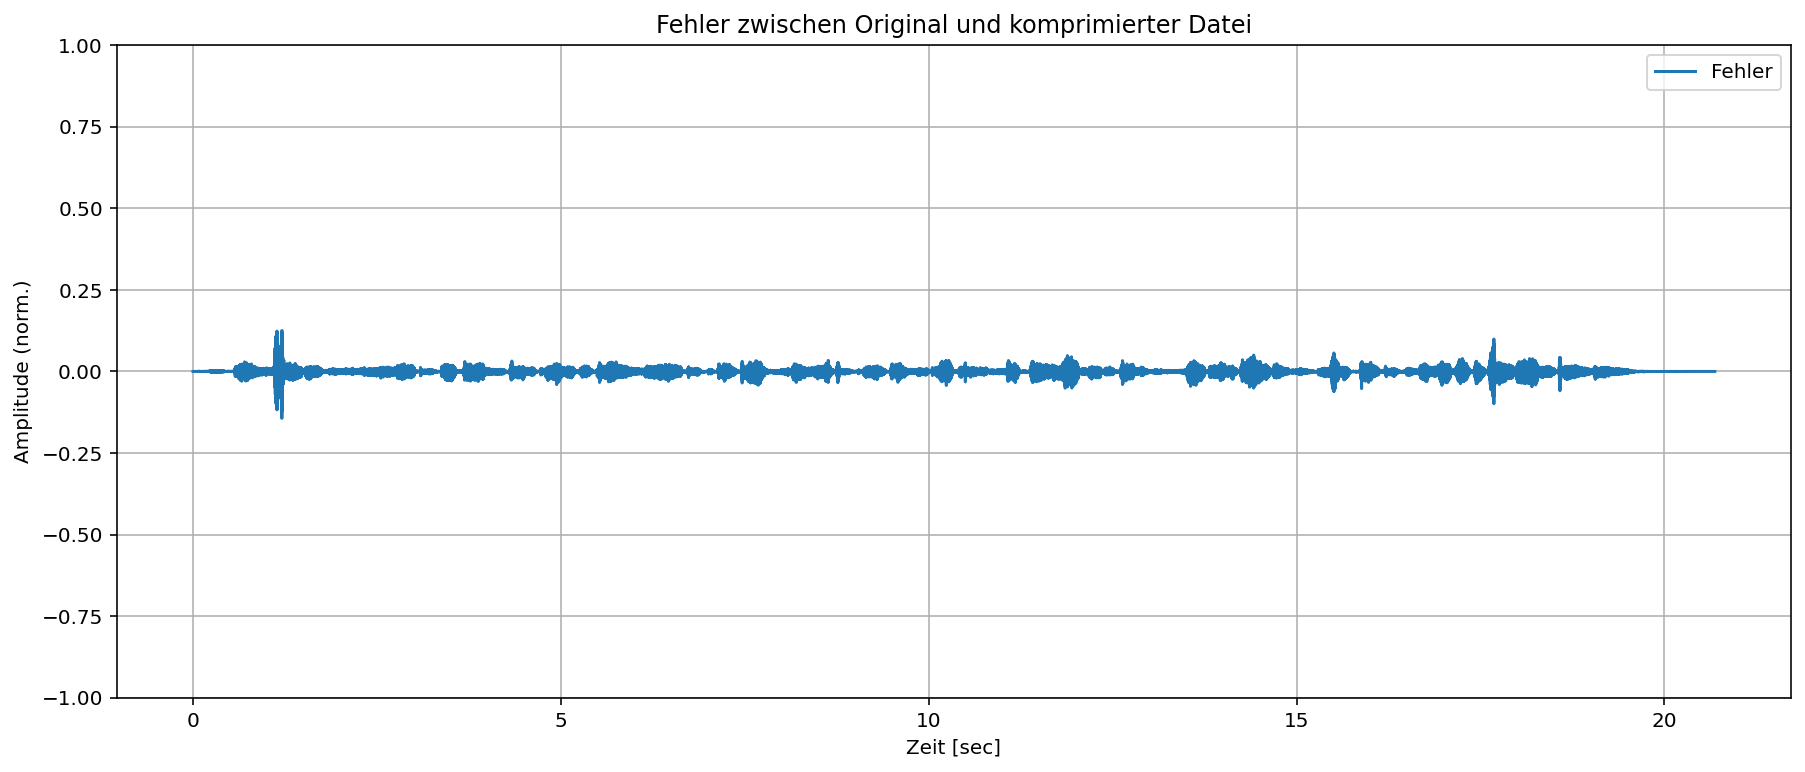

In [139]:
t = np.arange(len(audio1))/fs

fig = plt.figure(figsize=(15,6))
#plt.plot(t, (audio1-audio2)*8, label='Verstärktes Fehlersignal', color='gray', alpha=0.3)
plt.plot(t, (audio1-audio2), label='Fehler')
plt.xlabel('Zeit [sec]')
plt.ylabel('Amplitude (norm.)')
plt.grid()
plt.legend()
plt.title('Fehler zwischen Original und komprimierter Datei')
plt.ylim(-1,1)
plt.savefig('toms-diner-error128_time2.png', dpi=300)

In [136]:
# Verstärkung der Fehlerdatei um Faktor 50, um überhaupt etwas zu hören
scipy.io.wavfile.write('toms-diner-error128.wav', fs, diff*10)